File created by rydhslmy at 2022/11/30 09:00 AM.\
Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.\
Purpose : Act as comparison for the Deep Q-Network models that is to be created.

# Preparation Stage

In [1]:
## Import libraries
import os
import random
import math
from IPython.display import SVG
import numpy as np
import itertools

## Import custom
from lib import qLearning as ql
from lib import support as fn
from lib import mazeSVG as m

In [2]:
## Define main directories
configDir = 'maze_config'
resultDir = 'results'
tempDir = 'temp'
cDir = '.'
# c_dir = os.getcwd()

## Generate paths
## Path to maze config files
configPath = fn.gen_path(cDir, configDir)

## Path to maze results folder
resultPath = fn.gen_path(cDir, resultDir)

## Path to experimental results folder
tempPath = fn.gen_path(cDir, tempDir)

File 'maze_config' exist in '.'
File 'results' does not exist in '.'. A new file named 'results' is created.
File 'temp' exist in '.'


Scanning Maze Config File...
	8 maze config file(s) found.
	1 maze config set(s) found.
Scanning finished.
List of available maze configs:
	1) 22083010X10c4.txt
	2) 22100605X05c0.txt
	3) 22100605X05c1.txt
	4) 22100605X05c2.txt
	5) 22100605X05c3.txt
	6) 22100605X05c4.txt
	7) 22113040X40c0.txt
	8) 22113040X40c1.txt
	9) 230116_set0
Please choose maze configuration file!
	Input Select Index (1-9) : 3
	Selected '22100605X05c1.txt'
Reading Config File...
	Config file contain 1 maze.
	Loading maze config...
		Loading "./maze_config/22100605X05c1.txt"...
			File consists of 53 lines of data.
			Maze size loaded. 5X5 (25 states)
			Number of action loaded. There are 4 actions
			Next State list loaded.
			Current Reward list loaded.
		Finish loading "./maze_config/22100605X05c1.txt"
Choosing Goal State randomly for the maze in config data 1...
	Maze End Points :[3, 6, 13, 20, 24]
	Chosen Goal State : 13
	Start State Pool : [3, 6, 20, 24]
	Current Reward list updated.


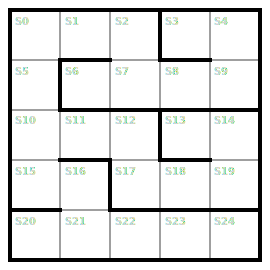

In [3]:
## Select maze config file
selectedConfig = fn.select_maze(configPath)

## Read maze config file
configData = fn.load_mazeConfig(configPath, selectedConfig)

## Set Goal State Reward
goalReward = 10

mazeSVG = []
## Choose a random goal state for all maze loaded and update the RT matrix
for data in configData:
    idx = 1 + configData.index(data)
    print(f'Choosing Goal State randomly for the maze in config data {idx}...')
    
    ## Select goal state randomly from possible candidates
    data['MEP'], data['GS'], data['SSP'] = fn.randomize_goal(data['NS'])
    
    print(f"\tMaze End Points :{data['MEP']}")
    print(f"\tChosen Goal State : {data['GS']}")
    print(f"\tStart State Pool : {data['SSP']}")
    
    ## Update Reward Matrix
    for i in range(data['N']):
        for j in range(data['Z']):
            if (data['NS'][i][j]==data['GS'])&(i != data['GS']):
                data['RT'][i][j] = goalReward
    print('\tCurrent Reward list updated.')

    ## Display maze for all loaded config data
    blankMaze = 'temp/temp.svg'
    mSVG = m.drawMaze(data['mX'], data['mY'], data['NS'])
    mSVG.gen_svg(blankMaze)
    display(SVG(blankMaze))
    mazeSVG.append(mSVG)

In [4]:
## Set Hyparameters
list_of_E = [10000] # List of total episodes
list_of_T_base = [10] # List of total steps
# list_of_alpha = [0.125, 0.25] # Learning Rate
list_of_alpha = [0.125] # Learning Rate
list_of_gamma = [0.875] # Discount Factor
list_of_epsilon = [0.99]

## Generate hyperparameter sets
tempList = [list_of_E, list_of_T_base, list_of_alpha, list_of_gamma, list_of_epsilon]
hypSets = list(itertools.product(*tempList))

In [5]:
class runSet:
    def __init__(self, mazeConfig, hyp, goalReward = 10):
        # Maze Environment
        self.mX = mazeConfig['mX']
        self.mY = mazeConfig['mY']
        self.N = mazeConfig['N']
        self.Z = mazeConfig['Z']
        self.NS = mazeConfig['NS']
        self.RT = mazeConfig['RT']
        self.MEP = mazeConfig['MEP']
        self.GS = mazeConfig['GS']
        self.SSP = mazeConfig['SSP']

        # Simulation hyperparameter
        self.E = hyp[0]
        self.T = hyp[1]*self.N
        self.alph = hyp[2]
        self.gamm = hyp[3]
        self.epsi = hyp[4]
        
        # Maze SVG Image
        self.mSVG = m.drawMaze(self.mX, self.mY, self.NS)

    def print_env(self):
        return None
    def print_hyp(self):
        return None


In [6]:
## Calculate the total number of run sets
### Get the total number of environment variation
envVar = len(configData)
print(envVar)

### Get the total number of hyperparameter variation
hypVar = len(hypSets)
print(hypVar)

### Calculate number of run sets
totalRuns = envVar*hypVar

## Generate hyperparameter sets
tempList = [configData, hypSets]
runSetList = list(itertools.product(*tempList))
print(len(runSetList))
## Update the T hyperparameter
runSets = []
for item in runSetList:
#     print(item)
#     temp = runSet(item[0], item[1])
    runSets.append(runSet(item[0], item[1]))

1
1
1


In [7]:
for runSet in runSets:
    idx = runSets.index(runSet)+1
    print(f"[Run Set {idx}/{len(runSets)}]")
    print(f"\tMaze Dimension   : {runSet.mX}×{runSet.mY}")
    print(f"\tMaze End Points  : {runSet.MEP}")
    print(f"\tGoal State       : S{runSet.GS}")
    print(f"\tStart State Pool : {runSet.SSP}")
    print(f"\tTotal Episode    : {runSet.E}")
    print(f"\tMaximum Step     : {runSet.T}")
    print(f"\tLearning Rate    : {runSet.alph}")
    print(f"\tDiscount Factor  : {runSet.gamm}")
    print(f"\tEpsilon          : {runSet.epsi}")
    print()

[Run Set 1/1]
	Maze Dimension   : 5×5
	Maze End Points  : [3, 6, 13, 20, 24]
	Goal State       : S13
	Start State Pool : [3, 6, 20, 24]
	Total Episode    : 10000
	Maximum Step     : 250
	Learning Rate    : 0.125
	Discount Factor  : 0.875
	Epsilon          : 0.99



 ### Perform Software Simulations

Inisialisasi simulasi *Q-learning* sesuai dengan jumlah *simulation sets* yang telah dihasilkan

In [8]:
## Intitialize empty list for the simulations
sw_list = []

## Initialize simulation for each hyperparameter sets
for run in runSets:
    ### Initialize Software Model and store in the simulation list
    i = 1 + runSets.index(run)
    print(f'[INITIALIZE SIMULATION {i}/{len(runSets)}]')
    sw = ql.qrl(maze_x = run.mX,
                maze_y = run.mY,
                total_state = run.N,
                total_action = run.Z,
                learning_rate = run.alph, 
                discount_factor = run.gamm,
                initial_exploration_rate = run.epsi,
                max_episode = run.E,
                max_step = run.T,
                goal_state = run.GS,
                reward_matrix = run.RT,
                ns_matrix = run.NS,
                random_pool = run.SSP
               )
    sw_list.append(sw)
total_run = len(runSets)

[INITIALIZE SIMULATION 1/1]


In [9]:
## Run all the simulation in the simulation list
for i in range(total_run):
    ### Run simulation and get runtime
    print(f'[Simulation {i+1}/{len(sw_list)}]')
    sw_list[i].start()

[Simulation 1/1]
 Progress = 100%
 Finished learning for 10000 episodes
 Runtime = 2.0612120628356934 s


===============[CONVERGENCE TEST 1/1]===============
 Goal reached count: 4/4
 Shortest path for Test 1:


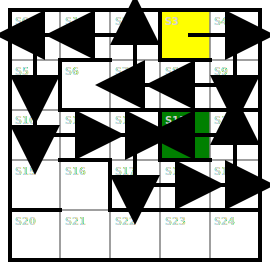

 Shortest path for Test 2:


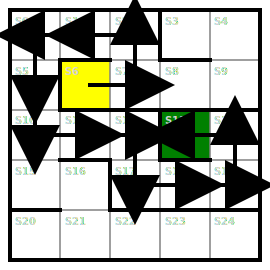

 Shortest path for Test 3:


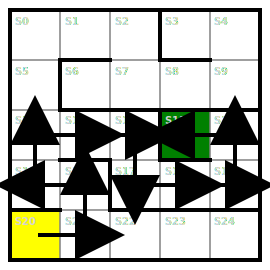

 Shortest path for Test 4:


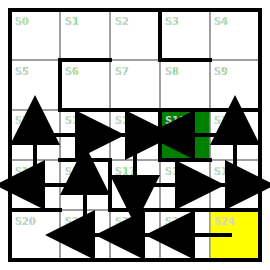

In [10]:
## Intialize empty list to store the convergence test results 
conv_test_results_list = []

## Perform Convergence Test for each simulation
for i in range(total_run):
    ### Run the convergence test and read the results
    print(f'{"="*15}[CONVERGENCE TEST {i+1}/{total_run}]{"="*15}')
    pass_count, records, fail_list = sw_list[i].shortest_path_test(quiet=True)
            
    ### Add results to the convergence test list
    conv_test_results = [pass_count, records, fail_list]
    conv_test_results_list.append(conv_test_results)
        
    ### [OPTIONAL] Display the results of the convergence test
    idx = 0
    for path in records:
        idx += 1
        print(f' Shortest path for Test {idx}:')
        temp = 'temp/temp.svg'
        runSets[i].mSVG.gen_svg(temp,path=path)
        display(SVG(temp))

 ### Save run results

Menyimpan semua hasil *simulation run* yang telah dilakukan.

In [11]:
## Generate Save Directory
save_dir = fn.gen_save_dir(resultPath, total_run, status = True)

CREATING ./results/idv_runs
CREATING ./results/idv_runs/230227_idv0
CREATING ./results/idv_runs/230227_idv0/raw_data
CREATING ./results/idv_runs/230227_idv0/shortest_path_test
CREATING ./results/idv_runs/230227_idv0/qMatrix_change


In [12]:
## Generate and save State Visit Count for each simulation run
for i in range(total_run):
    ### Get state visit count map
    svc = sw_list[i].state_visit_count.reshape((runSets[i].mX, runSets[i].mY))
    
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')

    ### Save state visit count map to the save path    
    fn.vis_svc(svc, gen_file=save_path, show=False)

Saved 'svc.png' to './results/idv_runs/230227_idv0'


Saved 'q_table.png' to './results/idv_runs/230227_idv0'


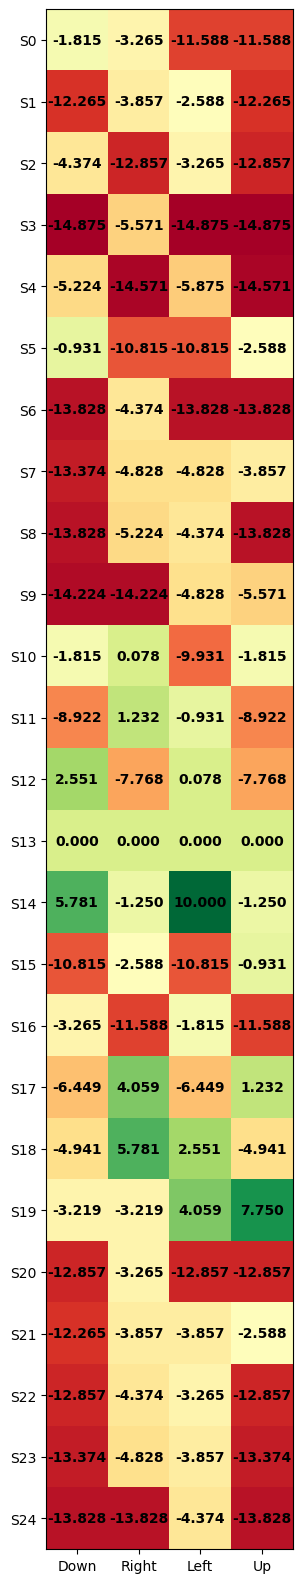

In [13]:
## Generate and save Q-Table Heatmap for each simulation run
for i in range(total_run):
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')
    
    ### Generate Q-Table Heatmap and save to the save path
    fn.display_qTable(sw_list[i].Q, gen_file=save_path)

Saved 'cumulativeReward.png' to './results/idv_runs/230227_idv0'


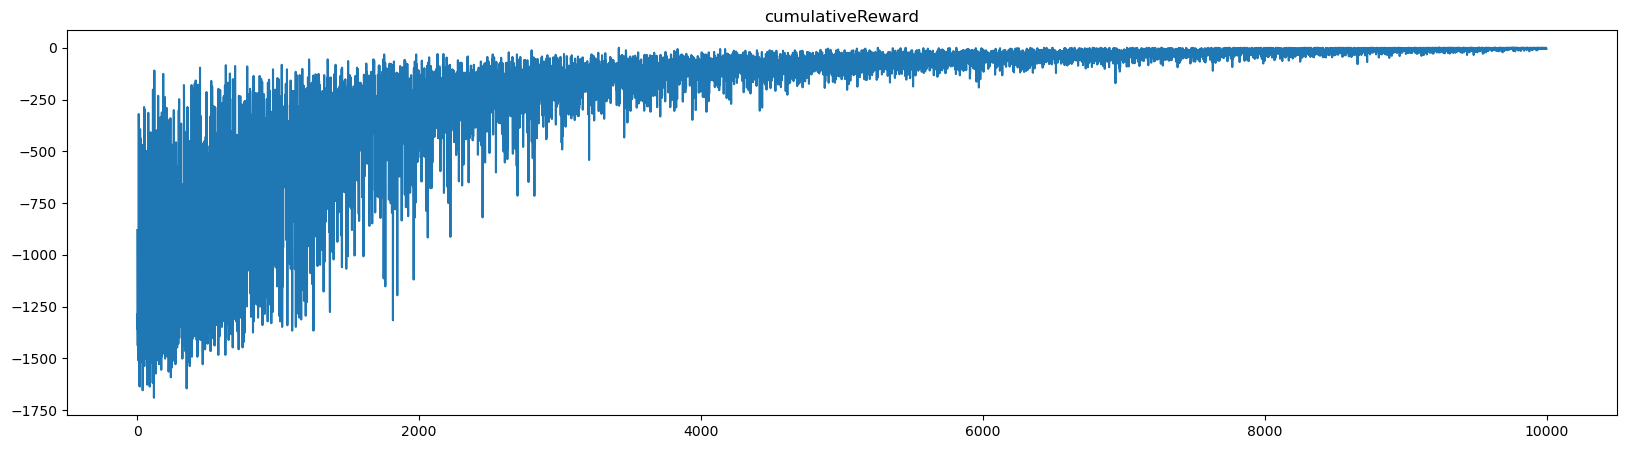

In [14]:
## Generate and save Cumulative Rewards for each simulation run
for i in range(total_run):
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')
    
    ### Generate Cumulative Reward Plot and save to the save path
    fn.plot(sw_list[i].cumulative_rewards, gen_file=save_path, title='cumulativeReward')

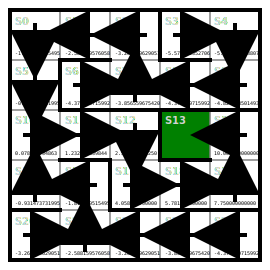

In [15]:
## Generate and save Convergence Map for each simulation run
for i in range(total_run):
    ### Generate Max Matrix
    max_matrix = fn.gen_maxMatrix(sw_list[i].Q)
    
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')

    ### Generate Convergence Map and save to Save Path
    mcm_file = 'convergence_map.svg'
    mcm_dir = os.path.join(save_path, mcm_file)
    runSets[i].mSVG.gen_convergenceMap(mcm_dir, max_matrix, runSets[i].GS)
    display(SVG(mcm_dir))

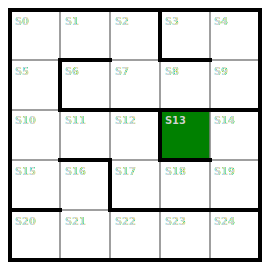

In [16]:
## Generate and save Maze Case for each simulation run
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')

    ### Generate Maze Case and save to Save Path
    maze_case_file = 'maze_case.svg'
    maze_case_dir = os.path.join(save_path, maze_case_file)
    runSets[i].mSVG.gen_svg(maze_case_dir, goal_st=runSets[i].GS)
    display(SVG(maze_case_dir))

In [17]:
## Generate and save Summary Data for each simulation run
for i in range(total_run):
    ### Initialize Summary Data
    main_list = []

    ### Add Hyperparameter data
    sub_list = []
    title = f'Hyperparameter'
    sub_list.append(title)
    ###
    hyparam = []
    hyparam.append(['Maze configuration file', selectedConfig])
    hyparam.append(['Total episode', runSets[i].E])
    hyparam.append(['Maximum step', runSets[i].T])
    hyparam.append(['Learning rate', runSets[i].alph])
    hyparam.append(['Discount factor', runSets[i].gamm])
    hyparam.append(['Epsilon', runSets[i].epsi])
    hyparam.append(['Goal state', runSets[i].GS])
    sub_list.append(hyparam)
    ###
    main_list.append(sub_list)

    ### Add Results data
    sub_list = []
    title = f'Results'
    sub_list.append(title)
    pass_count, records, fail_list = conv_test_results_list[i]
    ###
    hyparam = []
    hyparam.append(['Start State Pool', runSets[i].SSP])
    hyparam.append(['Learning time (s)', sw_list[i].runTime])
    hyparam.append(['Shortest path test', f'{pass_count}/{len(records)}'])
    if len(fail_list): hyparam.append(['Failed Case', f'{fail_list}'])
    sub_list.append(hyparam)
    ###
    main_list.append(sub_list)
    
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')

    ### Write Summary Data and save to Save Path 
    summary_file = 'summary.txt'
    fn.write_result_summary(summary_file, main_list, target_dir=save_path, quiet=False)

File 'summary.txt' generated and saved to './results/idv_runs/230227_idv0'


In [18]:
## Save Convergence Test Result for each simulation run
subfolder = 'shortest_path_test'
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')
        
    ### Read Records from Convergence Test Result
    records = conv_test_results_list[i][1]
    
    ### Save all of the Records
    for path in records:
        st = path[0][0]
        st1 = path[-1][-1]
        filename = f'S{st}_S{st1}.svg'
        sub_dir = os.path.join(save_path, subfolder)
        file_dir = os.path.join(sub_dir, filename)
        runSets[i].mSVG.gen_svg(file_dir,path=path)

In [19]:
## Save Raw Data for each simulation run
subfolder = 'raw_data'
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        digitCount=0
        n = total_run
        while(n > 0):
            digitCount = digitCount + 1
            n= n // 10
        idx = str(i).zfill(digitCount)
        save_path = os.path.join(save_dir, f'run_{idx}')
    sub_dir = os.path.join(save_path, subfolder)

    ### Write Q-Matrix File to Save Path
    filename = 'qMatrix.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].Q, delimiter=",")

    ### Write Exploration Count File to Save Path
    filename = 'expPerEpisode.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].exploration_per_episode, delimiter=",")

    ### Write Total Step Count File to Save Path
    filename = 'stepPerEpisode.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].step_per_episode, delimiter=",")

    ### Write State Visits File to Save Path
    filename = 'stateVisits.txt'
    target_path = os.path.join(sub_dir, filename)
    ### Get state visit count map
    svc = sw_list[i].state_visit_count.reshape((runSets[i].mX, runSets[i].mY))
    np.savetxt(target_path, svc, delimiter=",")

    ### Write Cumulative Reward File to Save Path
    filename = 'cumulativeReward.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].cumulative_rewards, delimiter=",")

In [20]:
# fn.plot(sw.exploration_per_episode, title='Exploration per episode')
# fn.plot(sw.step_per_episode, title='Total Step per episode')

## 